<a href="https://colab.research.google.com/github/tubagus86/IYKRA-Fellowship/blob/master/basic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import pandas as pd # untuk membaca dataset
import numpy as np # untuk perhitungan statistik
import matplotlib.pyplot as plt # untuk visualisasi
import seaborn as sns # untuk visualisasi
import plotly.express as px

In [122]:
df_ritz = pd.read_csv('Ritz_Jager_Data.csv')

In [123]:
df_ritz.shape

(66478, 32)

In [ ]:
# Cek missing values

df_ritz.isnull().sum()

Berdasarkan hasil di atas, terdapat missing values pada kolom children, country_origin, agent dan company

# **1. Where do the guest come from ?**

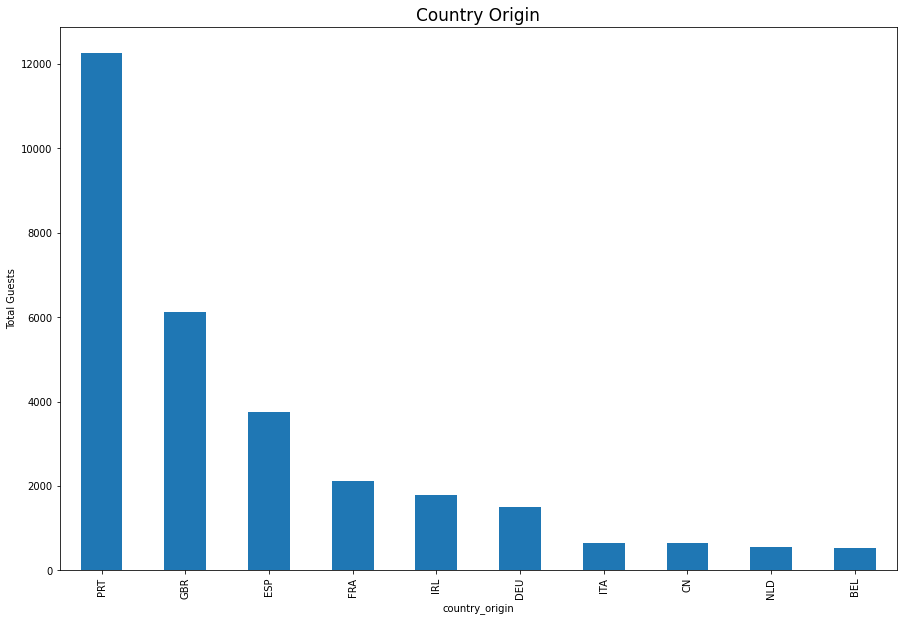

In [148]:
# Filter is_canceled = 0

df_ritz1 = df_ritz[df_ritz.is_canceled.eq(0)]

plt.figure(figsize = (15,10))
plt.title("Country Origin", fontsize = 17)
plt.ylabel("Total Guests")
df_ritz1.groupby(['country_origin']).size().sort_values(ascending= False).head(10).plot.bar()

# **2. How much do guests pay for a room per night?**

In [126]:
df_ritz1['adr'].describe()

count    34681.000000
mean        90.052510
std         55.561708
min         -6.380000
25%         52.560000
50%         75.000000
75%        111.000000
max        508.000000
Name: adr, dtype: float64

Berdasarkan hasil di atas terdapat 'adr' dibawah '0' karena tidak mungkin rata-rata harga per malam dibawah '0' maka perlu di filter 'adr' lebih besar dari '0'

In [156]:
df_ritz11 = df_ritz1.loc[df_ritz1['adr'] >0]

df_ritz11.adr.describe()


count    33854.00000
mean        92.25254
std         54.40162
min          0.26000
25%         54.70250
50%         76.50000
75%        112.63000
max        508.00000
Name: adr, dtype: float64

Sudah terlihat 'adr' paling kecil di 0.26

Text(0, 0.5, 'Average Daily Rate')

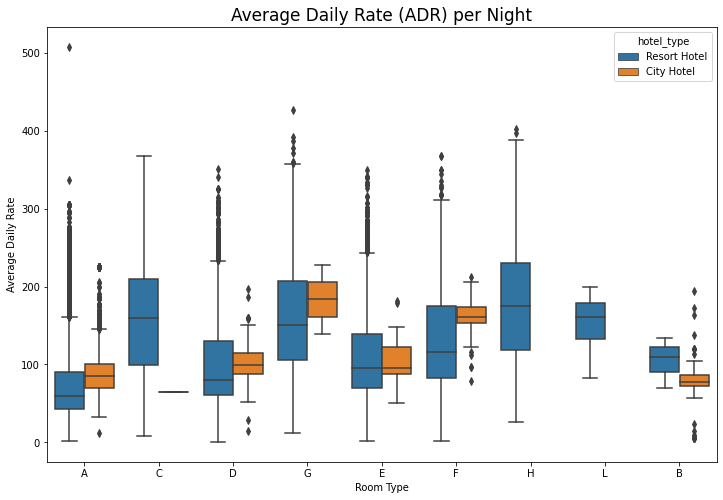

In [158]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type", y="adr",data=df_ritz11,
            hue = "hotel_type")
plt.title("Average Daily Rate (ADR) per Night", fontsize = 17 )
plt.xlabel("Room Type")
plt.ylabel("Average Daily Rate")

Dari visualisasi tersebut terlihat ada outlier yang ekstrem dengan harga diatas 500, karena tujuannya hanya untuk mengetahui rata-rata harga per kamar per malam
maka outliernya tidak dibuang.

# **3. How does the price per night vary over the year?**

Agar tidak muncul setting copy warning, buat variabel baru yang hanya berisi 3 kolom yang dibutuhkan karena setelahnya akan
buat list baru dengan nama ordered agar nama bulan pada sumbu x sesuai urutan bulannya.

Text(0, 0.5, 'Average Daily Rate')

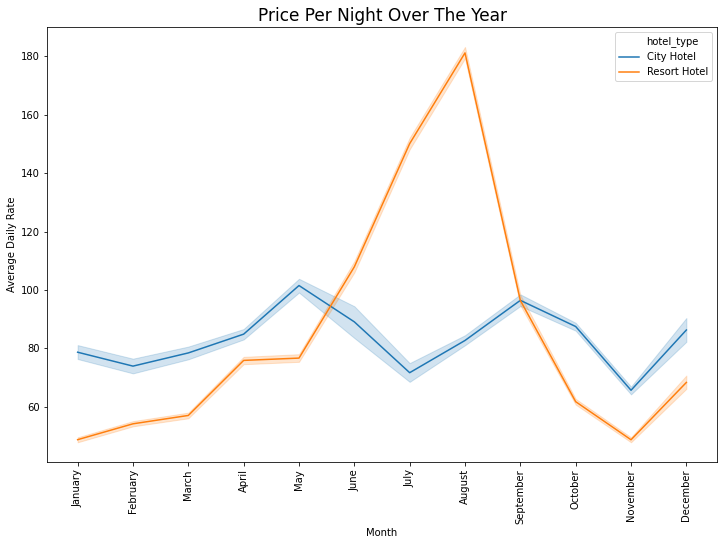

In [159]:
adr_monthly = df_ritz1[["hotel_type", "arrival_date_month", "adr"]].sort_values("arrival_date_month")


ordered = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
adr_monthly["arrival_date_month"] = pd.Categorical(adr_monthly["arrival_date_month"], categories=ordered, ordered=True)


plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel_type", data=adr_monthly, 
            hue_order = ["City Hotel", "Resort Hotel"],sizes=(2.5, 2.5))
plt.xticks(rotation=90)
plt.title("Price Per Night Over The Year", fontsize = 17)
plt.xlabel("Month")
plt.ylabel("Average Daily Rate")

Berdasarkan hasil tersebut harga tertinggi sepanjang tahun ada dibulan agustus.

# **4. Which are the busiest months?**

In [129]:
busiest_month = df_ritz1.groupby("arrival_date_month")["hotel_type"].count()

busiest_month1 = pd.DataFrame({"month": list(busiest_month.index),
                               "total guests": list(busiest_month.values)})

busiest_month1["month"] = pd.Categorical(busiest_month1["month"], categories=ordered, ordered=True)

Text(0, 0.5, 'Average Daily Rate')

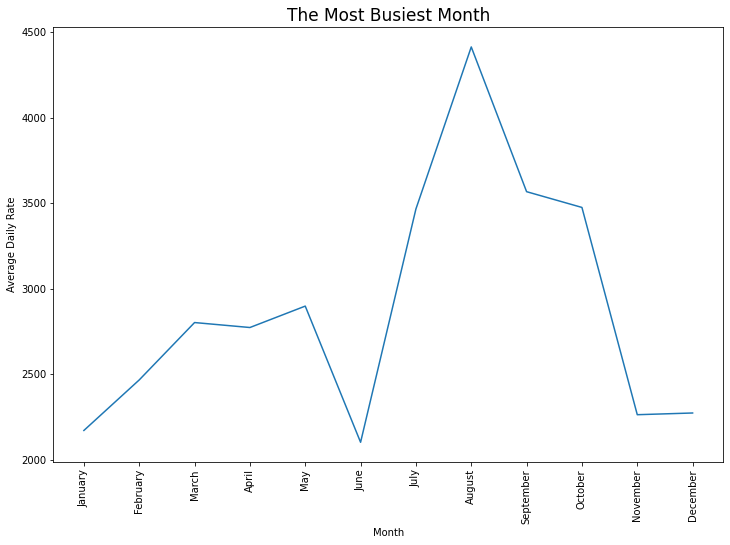

In [161]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="total guests", data=busiest_month1, 
            sizes=(2.5, 2.5))
plt.xticks(rotation=90)
plt.title("The Most Busiest Month", fontsize = 17)
plt.xlabel("Month")
plt.ylabel("Average Daily Rate")

Jumlah check in terbanyak ada pada bulan agustus, sesuai dengan tingginya harga di bulan yang sama, makin tinggi permintaan makin tinggi harga

# **5. How long do people stay at the hotels?**


Untuk mengetahui berapa lama setiap pelanggan menginap di hotel, kita perlu mengetahui jumlah hari stay in weekend night dan stay in week night, 2 kolom ini dipisah karena harga week day dan weekend berbeda sehingga mempengaruhi harga atau nilai pada kolom 'adr'.

In [131]:
resort_hotel  = df_ritz1.loc[df_ritz1['hotel_type']=='Resort Hotel']

city_hotel  = df_ritz1.loc[df_ritz1['hotel_type']=='City Hotel']

In [ ]:
resort_hotel['total_night'] = resort_hotel['stays_in_weekend_nights'] + resort_hotel['stays_in_week_nights']

city_hotel['total_night'] = city_hotel['stays_in_weekend_nights'] + city_hotel['stays_in_week_nights']

In [ ]:
city_hotel['total_night'].describe()

In [ ]:
resort_hotel["total_night"].describe()

In [135]:
num_nights_res = list(resort_hotel["total_night"].value_counts().index)
num_bookings_res = list(resort_hotel["total_night"].value_counts())
rel_bookings_res = resort_hotel["total_night"].value_counts()

num_nights_cty = list(city_hotel["total_night"].value_counts().index)
num_bookings_cty = list(city_hotel["total_night"].value_counts())
rel_bookings_cty = city_hotel["total_night"].value_counts()

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

In [163]:
fig = px.bar(nights_data, 
             x='num_nights',
             y='rel_num_bookings',
             color = 'hotel',
             barmode = 'group',
             range_x = [0,31],
             labels={
                     "num_nights": "Number of Night",
                     "rel_num_bookings": "Total Booking",
                     "hotel": "Hotel Type"
                 },
                title="Total Day People Stay at Hotel")

fig.update_layout(xaxis = dict(tickmode = 'linear',
                               tick0 = 1,
                               dtick = 1),
                  yaxis = dict(tickmode = 'linear',
                               tick0 = 500,
                               dtick = 500))

fig.show()

# **6. Bookings by market segment**


In [138]:
segment = df_ritz1['market_segment'].value_counts()

segment1 = pd.DataFrame({"market_segment": list(segment.index),
                               "total_booking": list(segment.values)})

segment1

,market_segment,total_booking
0,Online TA,13776
1,Offline TA/TO,7651
2,Direct,6095
3,Groups,4872
4,Corporate,2084
5,Complementary,203


In [165]:
fig = px.bar(segment1, 
             x='market_segment',
             y='total_booking',
             color = 'market_segment',
             labels={
                     "market_segment": "Market Segment",
                     "total_booking": "Total Booking",
                     },
                title="Total Booking Per Market Segment")
fig.show()

# **7. How many bookings were cancelled?**

In [140]:
df_ritz2 = df_ritz['is_canceled'].sum()

df_ritz2

31797

In [141]:
resort_canceled = df_ritz.loc[df_ritz['hotel_type']=='Resort Hotel']['is_canceled'].sum()

resort_canceled

11122

In [142]:
city_canceled = df_ritz.loc[df_ritz['hotel_type']=='City Hotel']['is_canceled'].sum()

city_canceled

20675

In [143]:
canceled_month = df_ritz.loc[df_ritz['is_canceled']==1].groupby("arrival_date_month")["is_canceled"].sum()

canceled_month1 = pd.DataFrame({"month": list(canceled_month.index),
                               "total canceled": list(canceled_month.values)})

canceled_month1["month"] = pd.Categorical(canceled_month1["month"], categories=ordered, ordered=True)

Text(0, 0.5, 'Total Canceled')

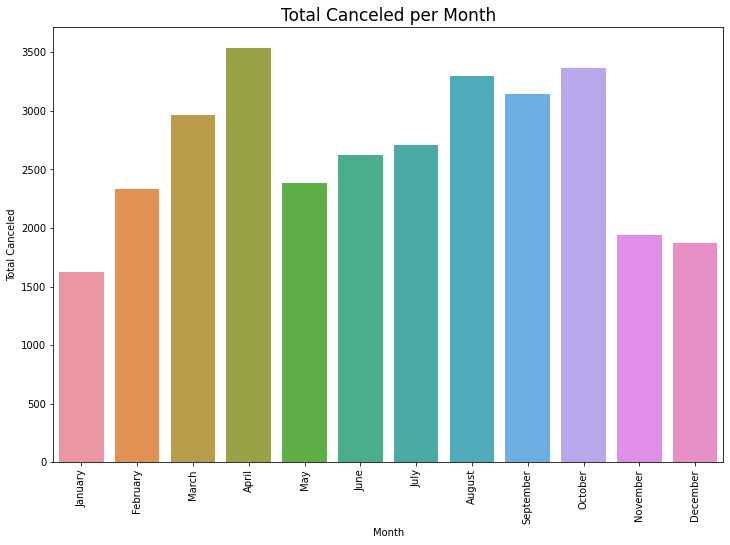

In [166]:
plt.figure(figsize=(12, 8))
sns.barplot(x = "month", y="total canceled", data=canceled_month1)
plt.xticks(rotation=90)
plt.title("Total Canceled per Month", fontsize = 17)
plt.xlabel("Month")
plt.ylabel("Total Canceled")